In [20]:
!pip install qiskit
import qiskit as q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install pylatexenc
import pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from qiskit.quantum_info import Statevector, Operator, ScalarOp, DensityMatrix
from qiskit import QuantumRegister
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import matplotlib.pyplot as plt
from qiskit import BasicAer
from qiskit.providers.aer import QasmSimulator

In [25]:
from qiskit import *
import numpy as np
import qiskit.quantum_info as qi
from qiskit.utils import QuantumInstance
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit.providers.aer import QasmSimulator

In [26]:
import time
from IPython import display
True

True

In [27]:
#Defining the expression in a function
def fun(a,b,c,e,f):
  fun= ((not c or (d and (not e)))and a and b)
  if fun==True:
    fun=1
  else :
    fun=0
  return fun

In [28]:
#All possible combinations into a diagonal array
from re import A
diag=np.arange(1024).reshape(32,32)
for m in [0,1]:
  if m==0:
      a=False
  else :
      a=True
  for q in [0,1]:
    if q==0:
           b=False
    else :
            b=True
    for i in [0,1]:
        if i==0:
           c=False
        else :
            c=True
        for j in [0,1]:
           if j==0:
              d=False
           else :
              d=True 
           for k in [0,1]:
                if k==0:
                   e=False
                else :
                   e=True 
                z=m*(16)+q*(8)+i*(4)+j*(2)+k
                for y in range(0,32):
                     if y==z:
                        diag[y,z]=(-1)**(fun(a,b,c,e,k)) 
                     else:
                        diag[y,z]=0
print(diag)

[[ 1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0  1]]


In [29]:
#Oracle formation
Oracle=QuantumCircuit(5,name='oracle')
racl=Operator(diag)
Oracle.unitary(racl,[0,1,2,3,4],label='Oracle')
Oracle.draw()

┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1        ├
     │         │
q_2: ┤2 Oracle ├
     │         │
q_3: ┤3        ├
     │         │
q_4: ┤4        ├
     └─────────┘

In [77]:
#Reflection code
qcdif = QuantumCircuit(5,name='Reflect')
for qubits in range (5) :
   qcdif.h(qubits)
for qubits in range (5) :
   qcdif.x(qubits)
qcdif.h([4])
qcdif.mct(list(range(4)),4)
qcdif.h(4)
for qubits in range (5) :
   qcdif.x(qubits)
for qubits in range (5) :
   qcdif.h(qubits)
qcdif.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_3: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

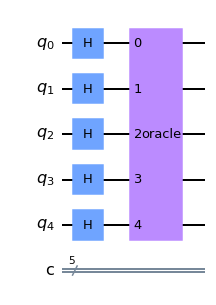

In [89]:
#Initialisation
backend = Aer.get_backend('statevector_simulator')
algo_ckt= QuantumCircuit(5,5)
for qubits in range (5) :
  algo_ckt.h(qubits)
algo_ckt.append(Oracle,[0,1,2,3,4])
algo_ckt.draw("mpl")

In [90]:
#Applying the algorithm
algo_qr = QuantumRegister(5)
algo_qc = QuantumCircuit(algo_qr, name='Oracle')
algo_qc.h([0,1,2,3,4])

#Oracle & Reflection
algo_qc.append(Oracle,[0,1,2,3,4])
algo_qc.append(qcdif,[0,1,2,3,4])

#Measurement

job=execute(algo_qc,backend)
result = job.result()
StV = qi.Statevector.from_instruction(algo_qc)

algo_qc.measure_all()
algo_qc.draw()

┌───┐┌─────────┐┌──────────┐ ░ ┌─┐            
q382_0: ┤ H ├┤0        ├┤0         ├─░─┤M├────────────
        ├───┤│         ││          │ ░ └╥┘┌─┐         
q382_1: ┤ H ├┤1        ├┤1         ├─░──╫─┤M├─────────
        ├───┤│         ││          │ ░  ║ └╥┘┌─┐      
q382_2: ┤ H ├┤2 oracle ├┤2 Reflect ├─░──╫──╫─┤M├──────
        ├───┤│         ││          │ ░  ║  ║ └╥┘┌─┐   
q382_3: ┤ H ├┤3        ├┤3         ├─░──╫──╫──╫─┤M├───
        ├───┤│         ││          │ ░  ║  ║  ║ └╥┘┌─┐
q382_4: ┤ H ├┤4        ├┤4         ├─░──╫──╫──╫──╫─┤M├
        └───┘└─────────┘└──────────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/════════════════════════════════╩══╩══╩══╩══╩═
                                        0  1  2  3  4

In [91]:
#Measurement of each possible combination. Favourable solutions have higher probablities,
#hence found the correct(favourable) solutions among all combinations
sim = QasmSimulator()
options = {'method': 'statevector'}
execute(algo_qc, sim, backend_options=options)
StV.draw('latex')

<IPython.core.display.Latex object>

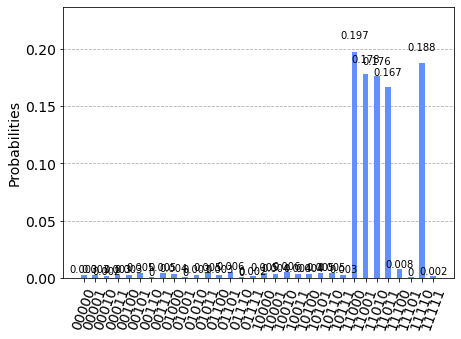

In [92]:
#Histogram plot(Favorable solutions identified )
aer_sim = Aer.get_backend('aer_simulator')
transpiled_algo_ckt = transpile(algo_qc, aer_sim)
qobj = assemble(transpiled_algo_ckt)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)